In [1]:
import pandas as pd

# Load the datasets
bbc = pd.read_csv("/kaggle/input/tv-commercial-nithi/BBC_Cleaned.csv")
cnn = pd.read_csv("/kaggle/input/tv-commercial-nithi/CNN_Cleaned.csv")
cnnibn = pd.read_csv("/kaggle/input/tv-commercial-nithi/CNNIBN_Cleaned.csv")
ndtv = pd.read_csv("/kaggle/input/tv-commercial-nithi/NDTV_Cleaned.csv")
timesnow = pd.read_csv("/kaggle/input/tv-commercial-nithi/TIMESNOW_Cleaned.csv")

# Combine the datasets into one
df = pd.concat([bbc, cnn, cnnibn, ndtv, timesnow], ignore_index=True)

# Display the first few rows of the combined dataframe
df.head()


,1,2,3,4,5,6,7,8,9,10,...,230,231,269,317,463,519,1028,137,689,128
0,123,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,3808.067871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,124,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check for missing values
df.isnull().sum()

1            0
2            0
3            0
4            0
5            0
         ...  
519     126637
1028    128815
137     129377
689     129592
128     129588
Length: 215, dtype: int64

In [3]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 02

In [5]:
import warnings
warnings.filterwarnings("ignore")

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '230', '231', '269', '317', '463', '519', '1028', '137', '689', '128'],
      dtype='object', length=215)


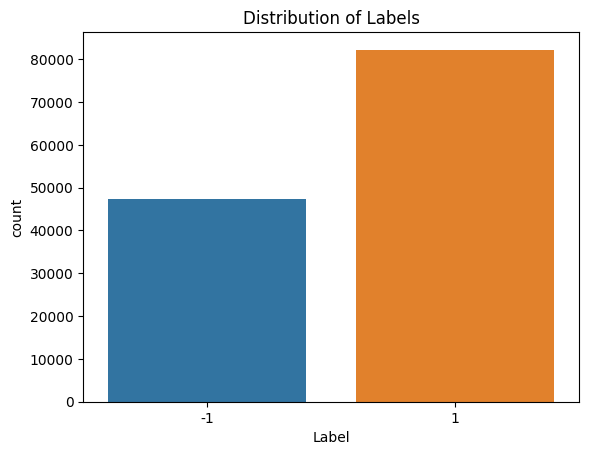

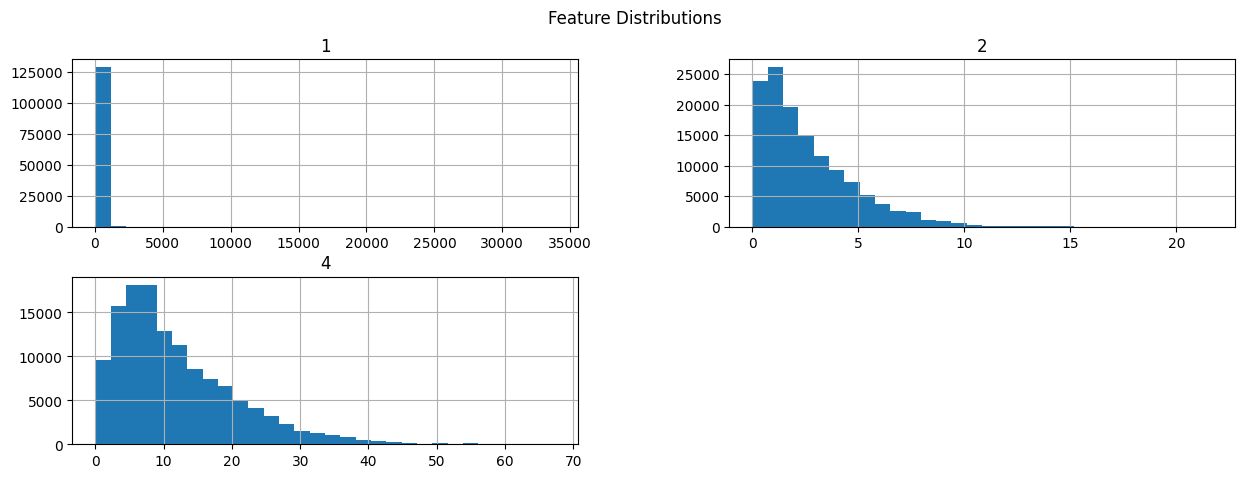

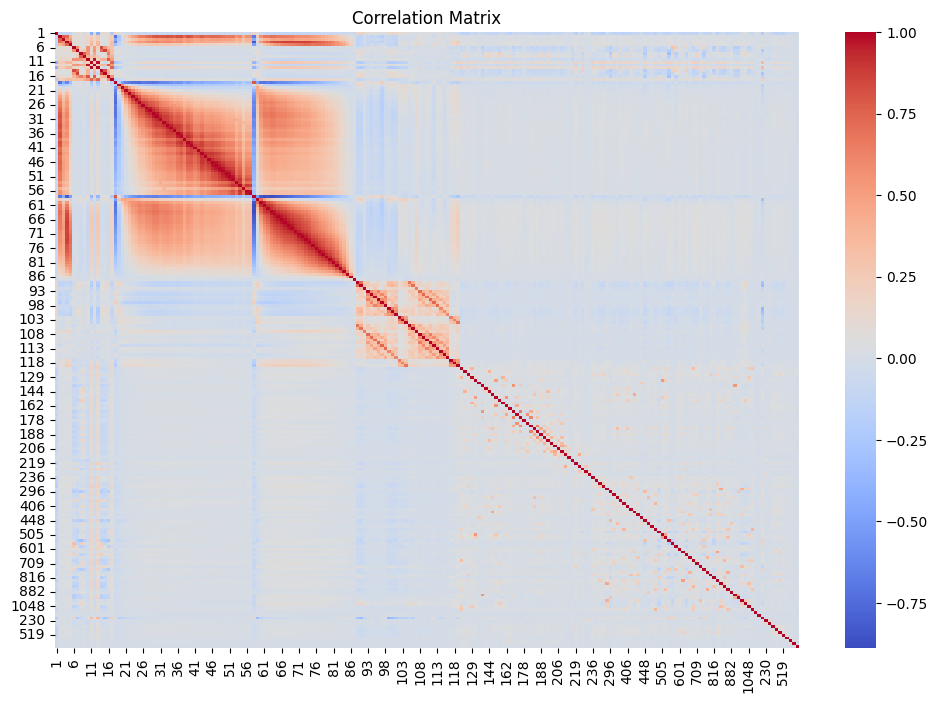

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names
print(df.columns)

# Plot the distribution of the label
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()

# Plot the distribution of a few selected features
selected_features = ['1', '2', '4']  # Use the correct column indices or names
df[selected_features].hist(bins=30, figsize=(15, 5))
plt.suptitle('Feature Distributions')
plt.show()

# Plot correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 04

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Train the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Logistic Regression evaluation
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)

# Random Forest evaluation
rf_clf_metrics = evaluate_model(y_test, y_pred_rf_clf)

log_reg_metrics, rf_clf_metrics

((0.8805567336237807,
  0.8935567618598065,
  0.9212799610658231,
  0.9072066135505901,
  array([[ 7695,  1804],
         [ 1294, 15144]])),
 (0.9511508655588542,
  0.9473901503981127,
  0.9771870057184572,
  0.9620579163297698,
  array([[ 8607,   892],
         [  375, 16063]])))

# 05

In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)
best_log_reg = grid_search_log_reg.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_clf = grid_search_rf.best_estimator_

# Evaluate the tuned models
y_pred_best_log_reg = best_log_reg.predict(X_test)
y_pred_best_rf_clf = best_rf_clf.predict(X_test)

# Logistic Regression after tuning
best_log_reg_metrics = evaluate_model(y_test, y_pred_best_log_reg)

# Random Forest after tuning
best_rf_clf_metrics = evaluate_model(y_test, y_pred_best_rf_clf)

best_log_reg_metrics, best_rf_clf_metrics

((0.8802482939430157,
  0.8935064935064935,
  0.9207932838544836,
  0.9069446941098928,
  array([[ 7695,  1804],
         [ 1302, 15136]])),
 (0.9510737556386629,
  0.9472784100961255,
  0.9771870057184572,
  0.9620002994460247,
  array([[ 8605,   894],
         [  375, 16063]])))

# 06

In [9]:
# Compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Tuned)', 'Random Forest', 'Random Forest (Tuned)'],
    'Accuracy': [log_reg_metrics[0], best_log_reg_metrics[0], rf_clf_metrics[0], best_rf_clf_metrics[0]],
    'Precision': [log_reg_metrics[1], best_log_reg_metrics[1], rf_clf_metrics[1], best_rf_clf_metrics[1]],
    'Recall': [log_reg_metrics[2], best_log_reg_metrics[2], rf_clf_metrics[2], best_rf_clf_metrics[2]],
    'F1-Score': [log_reg_metrics[3], best_log_reg_metrics[3], rf_clf_metrics[3], best_rf_clf_metrics[3]]
})

print(model_comparison)

                         Model  Accuracy  Precision    Recall  F1-Score
0          Logistic Regression  0.880557   0.893557  0.921280  0.907207
1  Logistic Regression (Tuned)  0.880248   0.893506  0.920793  0.906945
2                Random Forest  0.951151   0.947390  0.977187  0.962058
3        Random Forest (Tuned)  0.951074   0.947278  0.977187  0.962000
